# HW2

## GENERAL INSTRUCTIONS:

- CLEARLY mark where you are answering each question (all questions must be answered in Markdown cells, NOT as comments in code cells)
- Show all code necessary for the analysis, but remove superfluous code

---

Use the [Loan Dataset](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW2.csv) on GitHub to build the classification models described below.

## Variable Descriptions:
- `age`: age in years of person.
- `had_cancer`: 0 if the person has NOT had cancer or has cancer, 1 if they have.
- `gender_id`: `Male`, `Female`, `Non-Binary`, or `Survey Choices Do Not Accurately Reflect My Identity`.
- `income_in_k`: income in thousands of dollars.
- `state`: state person lives in.
- `credit_score`: credit score.
- `num_credit_sources`: number of sources of credit (includes credit cards, loans, car payments...etc).
- `utilization_rate`: the % of a person's total credit they use on average each month. For example if you have 10,000 dollars in available credit, and use 2,000 your utilization rate would be 0.2 (20%).
- `gave_loan`: whether or not the person got a loan.

## Instructions
1. *Build a KNN, Decision Tree, AND Logistic Regression model to predict whether or not someone got a loan (total of 3 models).*
    - If a variable/predictor has more than 2 categories, use `get_dummies()` to convert them into dummy variables (don't forget to remove the original column when training!).
    - use KFold with 5 folds (use the same KF loop to fit all three models)
    - Z-score your continuous variables only (interval data like age...etc can be counted as continuous)
    - For KNN, include only *continuous/interval* columns as predictors. For Decision Tree and Logistic Regression use ALL columns (other than `gave_loan`).
    - For KNN, choose K by using grid search.
    - For Decision Trees, set the `max_depth` if overfitting.
    - Record the Train/Test accuracies, and print out confusion matrices.
    
    
2. *Evaluate Your Models (ANSWER IN MARKDOWN CELL)*
    - A) Using accuracy and confusion matrices, **which model did best, how can you tell?**
    - B) **Are there differences in how well each model does for different gender IDs?**
    - C) **Are your models better at predicting people who got loans, or didn't get loans? How can you tell?**

In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

In [2]:
# data 

data = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW2.csv")
data.head()

,age,had_cancer,gender_id,income_in_k,state,credit_score,num_credit_sources,utilization_rate,gave_loan
0,39,0,Female,54,TX,448,4,0.32,0
1,43,0,Female,66,NJ,399,4,0.35,0
2,42,0,Male,50,NE,509,8,0.23,0
3,46,0,Female,79,TX,540,6,0.15,0
4,43,0,Female,49,NV,485,10,0.20,0


In [3]:
# Convert dummy variables
dummies = pd.get_dummies(data[["gender_id", "state"]])

# add variables back into the data frame
data = pd.concat([data, dummies], axis=1)

In [4]:
# 1. Build Models

predictors = ['age', 'had_cancer', 'income_in_k','credit_score', 
              'num_credit_sources', 'utilization_rate', 'gender_id_Female',
              'gender_id_Male', 'gender_id_Non-Binary', 
              'gender_id_Survey Choices Do Not Accurately Reflect My Identity',
              'state_TX', 'state_NJ', 'state_NE', 'state_NV', 'state_IA',
              'state_AL', 'state_WA', 'state_WV', 'state_CA', 'state_LA',
              'state_NY', 'state_GA', 'state_WI', 'state_MO', 'state_OR',
              'state_NM', 'state_MA', 'state_KS', 'state_MD', 'state_UT',
              'state_NH', 'state_AK', 'state_IL', 'state_SD', 'state_FL',
              'state_DE', 'state_MS', 'state_RI', 'state_ME', 'state_SC',
              'state_AR', 'state_ND', 'state_MI', 'state_CO', 'state_MN',
              'state_MT', 'state_AZ', 'state_PA', 'state_HI', 'state_TN',
              'state_ID', 'state_KY', 'state_NC', 'state_CT', 'state_OH',
              'state_WY', 'state_IN', 'state_OK', 'state_VT', 'state_VA']

X = data[predictors]
y = data["gave_loan"]

kf = KFold(5, shuffle = True)
#kf.split(X)

lr = LogisticRegression()

lr_train_acc = []
lr_test_acc = []
tree_train_acc = []
tree_test_acc = []
tree_depth = []
knn_acc = []
knn_train_acc = []
knn_test_acc = []
knn_best_estimators = []

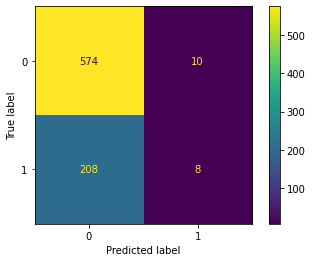

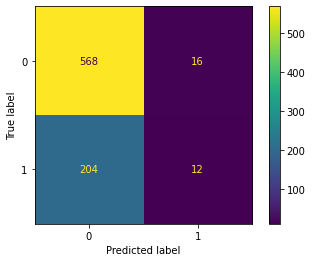

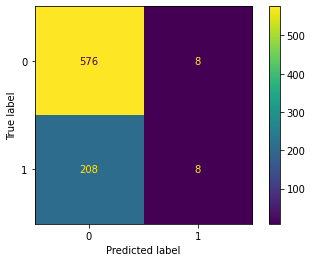

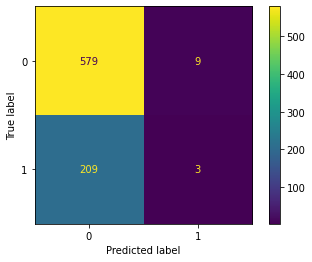

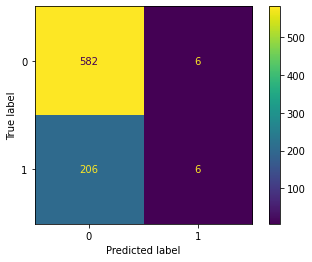

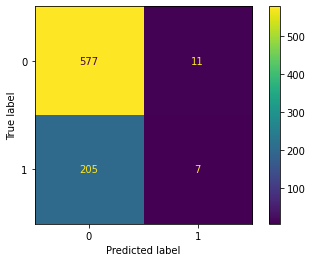

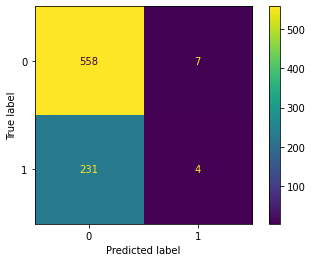

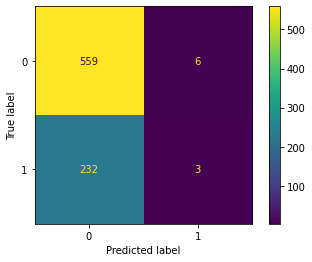

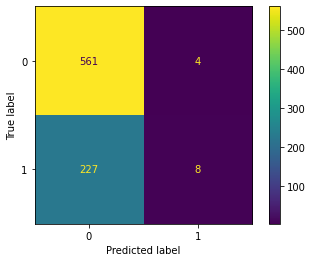

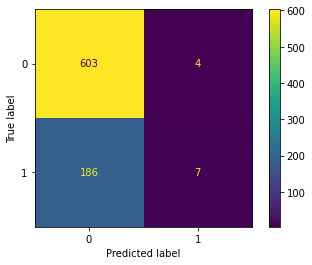

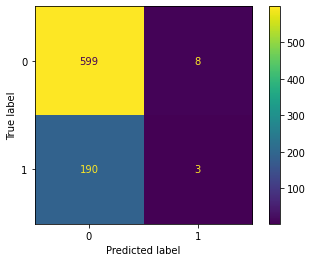

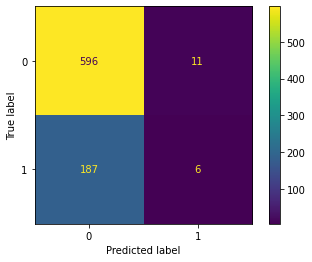

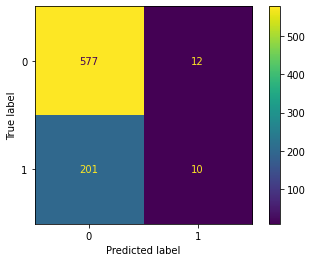

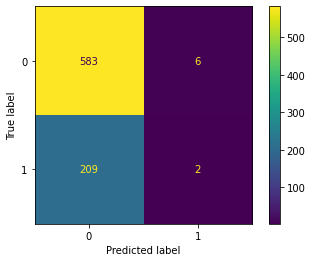

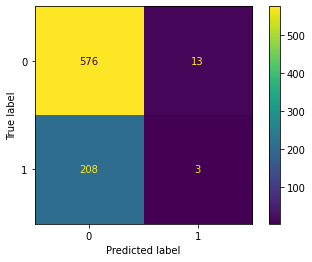

In [5]:
# Logistic Regression and Decision Tree

for train, test in kf.split(X):
    # Get your train/test for this fold
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]
    
    # Z-score continuous data
    zScore = StandardScaler()
    zScore.fit(X_train[['age', 'income_in_k', 
             'credit_score', 'num_credit_sources', 
             'utilization_rate']])
    
    X_train[['age', 'income_in_k', 
             'credit_score', 'num_credit_sources', 
             'utilization_rate']] = zScore.transform(X_train[['age', 
                                                              'income_in_k', 
                                                              'credit_score', 
                                                              'num_credit_sources', 
                                                              'utilization_rate']])
    X_test[['age', 'income_in_k',
            'credit_score', 'num_credit_sources', 
            'utilization_rate']] = zScore.transform(X_test[['age', 
                                                            'income_in_k', 
                                                            'credit_score',
                                                            'num_credit_sources',
                                                            'utilization_rate']])
    
    # For KNN, include only continuous/interval columns as predictors
    knnX_train = X_train[['age', 'income_in_k', 'credit_score', 'num_credit_sources', 
                         'utilization_rate']]
    knnX_test = X_test[['age', 'income_in_k', 'credit_score', 'num_credit_sources', 
                         'utilization_rate']]

    # create models
    model = lr.fit(X_train, y_train) 
    
    tree = DecisionTreeClassifier(max_depth = 4)
    tree.fit(X_train,y_train)
    
    # KNN Model
    
    knn = KNeighborsClassifier()
    ks = {"n_neighbors": range(1,30)}
    knn.fit(knnX_train,y_train)
    
    # use grid search to find best parameters
    grid = GridSearchCV(knn,ks, scoring = "accuracy", cv = 5) 
    #run the model validation for us and be the best fit model already
    knnModel = grid.fit(knnX_train, y_train)


    # record accuracy
    lr_train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    lr_test_acc.append(accuracy_score(y_test, model.predict(X_test)))
    
    tree_train_acc.append(tree.score(X_train,y_train))
    tree_test_acc.append(tree.score(X_test,y_test))
    tree_depth.append(tree.get_depth())
    
    knn_best_estimators.append(knnModel.best_estimator_.get_params()["n_neighbors"])
    knn_acc.append(knnModel.best_score_)
    knn_train_acc.append(knnModel.score(knnX_train,y_train))
    knn_test_acc.append(knnModel.score(knnX_test,y_test))
    
    # confusion matrices 
    plot_confusion_matrix(lr, X_test, y_test)
    plot_confusion_matrix(tree, X_test, y_test)
    plot_confusion_matrix(knnModel, knnX_test, y_test)


In [6]:
# Model Accuracies

print("Logistic Regression Model Training Acccuracy: " + str(np.mean(lr_train_acc)))
print("Logistic Regression Model Test Acccuracy: " + str(np.mean(lr_test_acc)))

print("Decision Tree Model Training Accuracy: " + str(np.mean(tree_train_acc)))
print("Decision Tree Model Test Accuracy: " + str(np.mean(tree_test_acc)))
print("Average Tree Depth: " + str(np.mean(tree_depth)))

print("KNN Model Average Best Accuracy: " + str(np.mean(knn_acc)))
print("KNN Model Training Accuracy: " + str(np.mean(knn_train_acc)))
print("KNN Model Testing Accuracy: " + str(np.mean(knn_test_acc)))
print("KNN Average Best Estimator: " + str(np.mean(knn_best_estimators)))

Logistic Regression Model Training Acccuracy: 0.7345625
Logistic Regression Model Test Acccuracy: 0.73075
Decision Tree Model Training Accuracy: 0.739625
Decision Tree Model Test Accuracy: 0.7292500000000001
Average Tree Depth: 4.0
KNN Model Average Best Accuracy: 0.73225
KNN Model Training Accuracy: 0.739125
KNN Model Testing Accuracy: 0.7295
KNN Average Best Estimator: 25.0


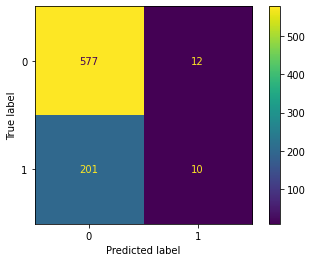

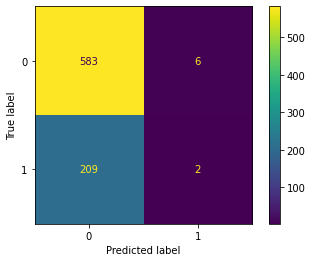

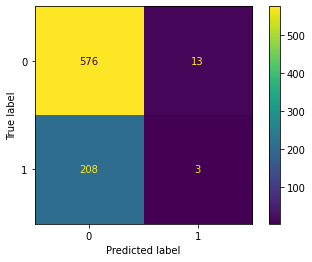

In [7]:
# Confusion Matrices

plot_confusion_matrix(lr, X_test, y_test)
plot_confusion_matrix(tree, X_test, y_test)
plot_confusion_matrix(knnModel, knnX_test, y_test)

### 2. Evaluate Your Models 
#### A) Using accuracy and confusion matrices, which model did best, how can you tell?
Based on the testing accuracies of the models we produced, the most accurate model was K-NN model. The average K-NN accuracy was the highest, but only by very little compared to the Logistic Regression model. We also see that the in the above confusion matrices, the K-NN model had the most correct predictions on its main diagonal. 


### 2. Evaluate Your Models 
#### B) Are there differences in how well each model does for different gender IDs?
My aim was to run the predicted values by each model and compare it to the actual values  for each of the gender IDs however I was unsuccessful in completing this. 

In [12]:
# 2. Evaluate Your Models 

lr_predicted = lr.predict(X)
data["lr_predicted"] = lr_predicted

tree_predicted = tree.predict(X)
data["tree_predicted"] = tree_predicted

knn_predicted = knn.predict(X[['age', 'income_in_k', 'credit_score', 
                               'num_credit_sources', 
                               'utilization_rate','gender_id_Female',
                               'gender_id_Male', 'gender_id_Non-Binary', 
                               'gender_id_Survey Choices Do Not Accurately Reflect My Identity']])
data["knn_predicted"] = knn_predicted


ValueError: query data dimension must match training data dimension

#### C) Are your models better at predicting people who got loans, or didn't get loans? How can you tell? 
Based on the confusion matrices, we can tell how many people were correctly predicted (to receive and not receive a loan) for each model. For every one of the models, the confusion matrices show that each of them are better at predicting a true negative, or when people did not get loans. 